In [1]:
import json
import pandas as pd

with open("../data/interim/comedy_preprocessed.json", "r", encoding="utf-8") as f:
    data = json.load(f)

df = pd.DataFrame(data)
df.head()

,url,comedian,special,transcript,text_clean,text_lower
0,https://scrapsfromtheloft.com/comedy/conan-obr...,Conan O'Brien,None,Conan O’Brien: The Kennedy Center Mark Twain P...,Conan O’Brien: The Kennedy Center Mark Twain P...,conan o’brien: the kennedy center mark twain p...
1,https://scrapsfromtheloft.com/comedy/cristela-...,Cristela Alonzo,None,Cristela Alonzo: Middle Classy (2022) | Full t...,Cristela Alonzo: Middle Classy (2022) | Full t...,cristela alonzo: middle classy (2022) | full t...
2,https://scrapsfromtheloft.com/comedy/dave-chap...,Dave Chappelle,None,Dave Chappelle: The Unstoppable (2025)Release ...,Dave Chappelle: The Unstoppable (2025)Release ...,dave chappelle: the unstoppable (2025)release ...
3,https://scrapsfromtheloft.com/comedy/dave-smit...,Dave Smith,None,Part of the ProblemEpisode number:1306Premiere...,Part of the ProblemEpisode number:1306Premiere...,part of the problemepisode number:1306premiere...
4,https://scrapsfromtheloft.com/comedy/david-spa...,David Spade,None,David Spade: Dandelion (2025) [cheers and appl...,David Spade: Dandelion (2025) <APPLAUSE> Nice....,david spade: dandelion (2025) <applause> nice....


### Extracting Basic Style Features

In [2]:
# Word and sentence counts

import re

def sentence_count(text):
    return len(re.findall(r"[.!?]", text))

df["word_count"] = df["text_clean"].str.split().str.len()
df["sentence_count"] = df["text_clean"].apply(sentence_count)
df["avg_sentence_length"] = df["word_count"]/df["sentence_count"]

df[["word_count", "sentence_count", "avg_sentence_length"]].head(5)

,word_count,sentence_count,avg_sentence_length
0,1024,110,9.309091
1,7357,1090,6.749541
2,9941,913,10.888280
3,5030,316,15.917722
4,2358,270,8.733333


In [3]:
# Vocabulary size and lexical diversity

df["vocab_size"] = df["text_lower"].apply(lambda x: len(set(x.split())))
df["lexical_diversity"] = df["vocab_size"] / df["word_count"]

df[["vocab_size", "lexical_diversity"]].head()

,vocab_size,lexical_diversity
0,509,0.497070
1,1944,0.264238
2,2534,0.254904
3,1425,0.283300
4,940,0.398643


### higher diversity means varied language and lower means repitition

### Profanity

In [4]:
PROFANITY = {
    "fuck", "shit", "ass", "bitch", "damn", "fucking", "bullshit"
}

df["profanity_count"] = df["text_lower"].apply(
    lambda x: sum(1 for w in x.split() if w in PROFANITY)
)

df["profanity_per_1k_words"] = (df["profanity_count"] / df["word_count"]) * 1000

df[["profanity_count", "profanity_per_1k_words"]].head()


,profanity_count,profanity_per_1k_words
0,0,0.000000
1,32,4.349599
2,47,4.727895
3,1,0.198807
4,6,2.544529


### Some comedians lean heavily on profanity

### next is comedians with questions usage:
- Like "you ever notice...?" or "why is it that...?"

In [5]:
df["question_count"] = df["text_clean"].str.count(r"\?")
df["questions_per_1k_words"] = (df["question_count"] / df["word_count"])*1000

df[["question_count", "questions_per_1k_words"]].head()

,question_count,questions_per_1k_words
0,8,7.812500
1,234,31.806443
2,87,8.751635
3,33,6.560636
4,42,17.811705


In [6]:
style_features = [
    "avg_sentence_length",
    "lexical_diversity",
    "profanity_per_1k_words",
    "questions_per_1k_words"
]

comedian_style = df.groupby("comedian")[style_features].mean()
comedian_style


,avg_sentence_length,lexical_diversity,profanity_per_1k_words,questions_per_1k_words
comedian,,,,
ComedianSammy,10.167637,0.243302,2.175406,10.533547
Conan O'Brien,9.309091,0.497070,0.000000,7.812500
Cristela Alonzo,6.749541,0.264238,4.349599,31.806443
Dave Chappelle,10.888280,0.254904,4.727895,8.751635
Dave Smith,15.917722,0.283300,0.198807,6.560636
David Spade,8.733333,0.398643,2.544529,17.811705
Doug Stanhope,10.690058,0.300109,1.750547,11.050328
Eddie Izzard,10.888889,0.279983,4.193458,17.193179
Greer Barnes,10.510417,0.506442,0.000000,22.794846


### Visualize style difference

<Axes: title={'center': 'Average Sentence Length by Comedian'}, ylabel='comedian'>

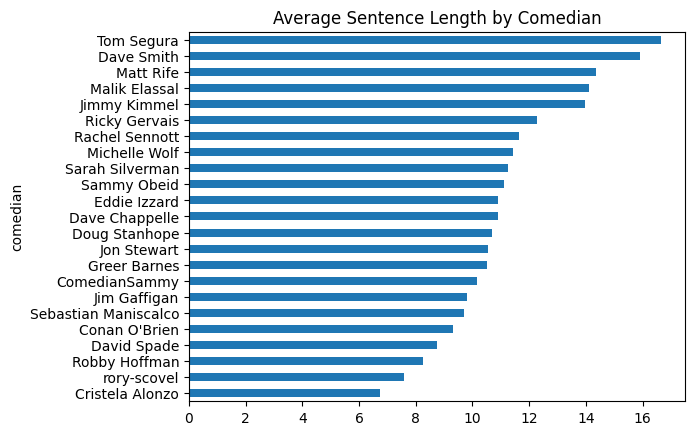

In [8]:
# comparing average sentence length
comedian_style["avg_sentence_length"].sort_values().plot(
    kind="barh", title="Average Sentence Length by Comedian"
)


<Axes: title={'center': 'Profanity Usage by Comedian'}, ylabel='comedian'>

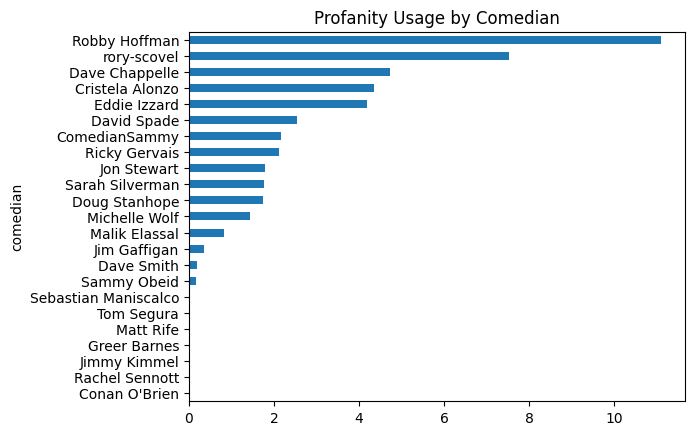

In [9]:
comedian_style["profanity_per_1k_words"].sort_values().plot(
    kind = "barh", title="Profanity Usage by Comedian"
)